## This notebook fits secondary peaks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.37'

In [2]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

In [3]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

In [4]:
file_ext='.txt'
exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Spec']
Diad_Files=pf.get_diad_files(path=spectra_path, file_ext=file_ext, exclude_str=exclude_str)
print(Diad_Files)

['02 MP2_61_FIA_50X_12mW.txt', '04 MP2_62_FIA_50X_vweak.txt', '06 MP2_64_FIA_12mW.txt', '07 MP2_64_FIA_8mW.txt', '08 MP2_64_FIB_8mW.txt', '10 MP2_64_FIC_8mW.txt', '11 MP2_64_FID_8mW.txt', '13 MP2_64_FIE_8mW.txt', '14 MP2_64_FIE_12mW.txt', '15 MP2_64_FIF_8mW.txt', '17 MP2_64_FIF_5mW.txt', '18 MP2_64_FIG_5mW.txt', '20 MP2_64_FIG_5mW_r1.txt', '21 MP2_64_FIH_5mW_r1.txt', '22 MP2_64_FII_5mW.txt', '24 MP2_64_FIJ_5mW.txt', '25 MP2_64_FIK_5mW.txt', '27 MP2_65_level1_FIA_5mW.txt', '28 MP2_65_level1_FIB_5mW.txt', '32 MP2_65_level2_FIE_12mW.txt', '35 MP2_65_level2_FIG_12mW_doublepeak.txt', '36 MP2_65_level2_FIG_50X_5mW_doublepeak.txt', '38 MP2_66_FIA_12mW.txt', '39 MP2_66_FIB_12mW.txt', '40 MP2_66_FIC_12mW.txt', '41 MP2_66_FIC_8mW.txt', '43 MP2_67_FIA_8mW.txt', '44 MP2_67_FIB_8mW.txt', '46 MP2_67_FIC_8mW.txt', '47 MP2_67_FID_8mW.txt', '49 MP2_68_FIA_8mW.txt', '50 MP2_68_FIB_8mW.txt']


## Plot spectra in a given region of space to examine secondary peaks or not

### You'll need to tweak the peak parameters to find them
- height = minimum height a peak should have to be identified
- threshold = required vertical distance between a peak and its neighbours
- distance = required horizontal distance bewteen neighbouring peaks. 
- prominence = required prominence of peaks
- width = width of peaks


generic_peak_config(name='generic', lower_bck=(1060, 1065), upper_bck=(1120, 1130), x_range_bck=10, N_poly_carb_bck=1, amplitude=1000, cent_generic=1090, outlier_sigma=12, N_peaks=1, distance=10, prominence=10, width=[1, 10], threshold=1, height=10, exclude_range=None, dpi=100, plot_figure=True, return_other_params=False)


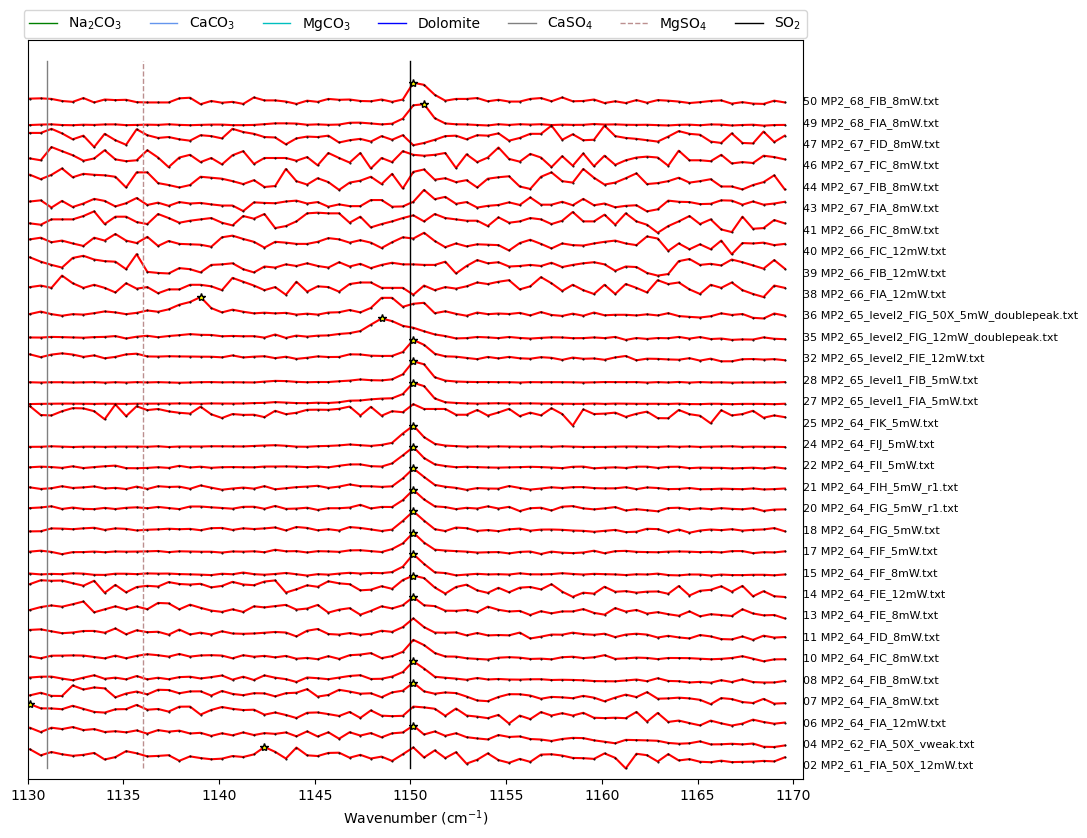

In [15]:
config_sec_SO2=pf.generic_peak_config(N_peaks=1, 
            prominence=10, height=10,
            width=[1, 10], threshold=1)
print(config_sec_SO2)

SO2_peaks, x_data, y_data, fig=pf.plot_secondary_peaks(Diad_Files=Diad_Files, path=spectra_path, 
            filetype=filetype, config=config_sec_SO2, sigma_filter=True, sigma=0, 
      xlim=[1130, 1170], yscale=0.3)

fig.savefig('Peak_Fit_2.png', dpi=200, bbox_inches='tight')

### Now lets do an approximate peak fit for SO$_2$
- As always, set up for 1 file to get background, then loop through others

In [8]:
File_df=pd.DataFrame(data={'filename': Diad_Files})
filenames_SO2=list(File_df['filename'].loc[(
    (SO2_peaks['pos'].between(1145, 1160))
    &
    (SO2_peaks['prom']>10)
    )])
filename=filenames_SO2[5]
filename

'15 MP2_64_FIF_8mW.txt'

generic_peak_config(name='SO2', lower_bck=[1110, 1130], upper_bck=[1160, 1180], x_range_bck=5, N_poly_carb_bck=1, amplitude=1000, cent_generic=1150, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, height=100, exclude_range=None, dpi=100, plot_figure=True, return_other_params=False)
C:\Users\penny\Google Drive\My Drive\Berkeley_NEW\MaunaLoa\RamanData\02_01_2022\Spectra/Secondary_fit_Images


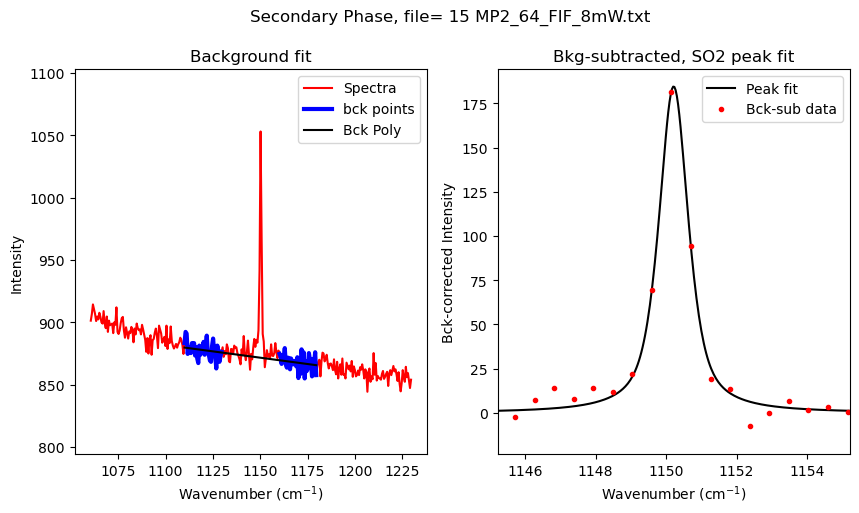

In [9]:
SO2_peak_config=pf.generic_peak_config(name='SO2', lower_bck=[1110, 1130],
upper_bck=[1160, 1180], cent_generic=1150, x_range_bck=5)
print(SO2_peak_config)

SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
path=spectra_path, filename=filename, filetype=filetype,
model_name='PseudoVoigtModel',
 plot_figure=True)

In [8]:
SO2_peak_fit

,filename,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2
0,15 MP2_64_FIF_8mW.txt,1150.214601,259.23398,184.399364


## Now lets loop through files

In [10]:
from tqdm import tqdm
plot_figure=False # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself
to_clipboard=False # Copies to clipboard
files_to_fit=filenames_SO2

df_Merge_Carb = pd.DataFrame([])
df_Merge_SO2 = pd.DataFrame([])
for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=Diad_Files[i]
    
#     Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
# path=spectra_path, filename=filename, filetype=filetype,
# model_name='PseudoVoigtModel',
#  plot_figure=plot_figure)

    SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
path=spectra_path, filename=filename, filetype=filetype,
model_name='PseudoVoigtModel',
 plot_figure=plot_figure)
 

    #df_Merge_Carb = pd.concat([df_Merge_Carb, Carb_peak_fit], axis=0)
    df_Merge_SO2 = pd.concat([df_Merge_SO2, SO2_peak_fit], axis=0)


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 23.35it/s]


In [11]:
df_Merge_SO2

,filename,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2
0,02 MP2_61_FIA_50X_12mW.txt,1149.940180,24.494607,58.693131
0,04 MP2_62_FIA_50X_vweak.txt,1150.150490,985.323285,605.269420
0,06 MP2_64_FIA_12mW.txt,1150.696498,133.647900,88.338885
0,07 MP2_64_FIA_8mW.txt,1150.153223,111.031603,69.232455
0,08 MP2_64_FIB_8mW.txt,1150.251490,395.664676,246.823816
0,10 MP2_64_FIC_8mW.txt,1150.327741,201.670856,145.371451
0,11 MP2_64_FID_8mW.txt,1150.160303,393.153369,266.409719
0,13 MP2_64_FIE_8mW.txt,1150.189725,112.864089,79.079383
0,14 MP2_64_FIE_12mW.txt,1150.239977,92.424226,75.149929
0,15 MP2_64_FIF_8mW.txt,1150.214601,259.233980,184.399364


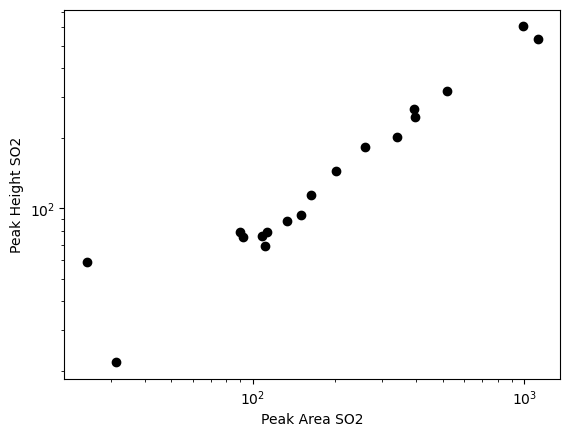

In [12]:
SO2_cutoff=SO2_peaks['prom']>100
plt.plot(df_Merge_SO2['Peak_Area_SO2'], 
        df_Merge_SO2['Peak_Height_SO2'], 'ok')
#plt.plot(df_Merge_SO2['Peak_Area_SO2'], SO2_peaks['prom'], 'or')
plt.xlabel('Peak Area SO2')
plt.ylabel('Peak Height SO2')
plt.yscale('log')
plt.xscale('log')